In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from jupyterworkflow.data import get_fremont_data
import pandas as pd
import numpy as np

# Load data

In [2]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [11]:
# download if necessary and load data
data = get_fremont_data()
data.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


## plot data

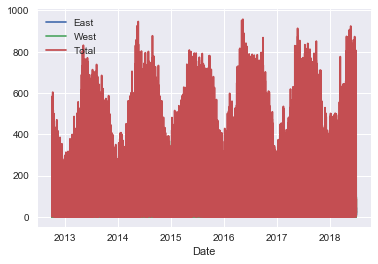

In [12]:
data.plot();

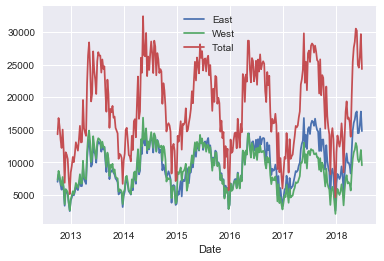

In [13]:
data.resample('W').sum().plot();

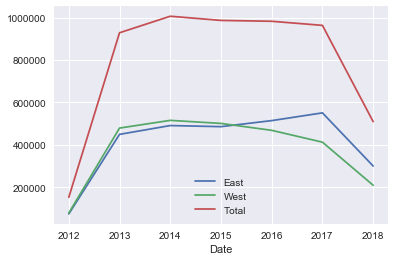

In [14]:
data.resample('Y').sum().plot();

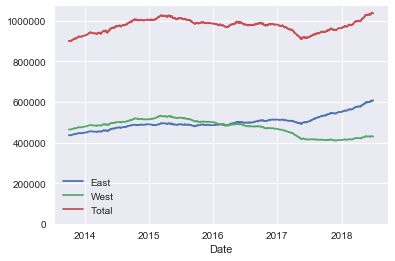

In [15]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None);

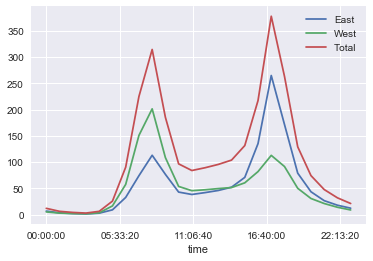

In [16]:
data.groupby(data.index.time).mean().plot();

In [17]:
# This can also be done as day of week in index and different weeks for columns

# this is hour in the index and days in the columns, gives the traffic flow for each hour of the day 
pivoted_table = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted_table.head()

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2018-06-21,2018-06-22,2018-06-23,2018-06-24,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,21.0,23.0,9.0,19.0,6.0,21.0,11.0,11.0,9.0,45.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,7.0,13.0,7.0,8.0,4.0,2.0,3.0,1.0,6.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,3.0,8.0,4.0,5.0,3.0,3.0,3.0,1.0,6.0,6.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,4.0,5.0,5.0,4.0,3.0,2.0,5.0,4.0,4.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,9.0,12.0,8.0,6.0,8.0,13.0,22.0,10.0,11.0,5.0


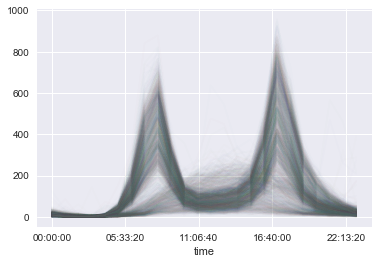

In [18]:
pivoted_table.plot(legend = False, alpha = 0.01)

 # Refactored code

In [4]:
data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)

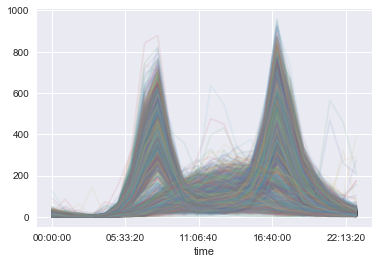

In [5]:
pivoted.plot(legend=False, alpha = 0.1);

In [9]:
pivoted.T.shape
# this yields 2097 observations for hour of the day 

(2097, 24)

In [11]:
from sklearn.decomposition import PCA
PCA(2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
X = pivoted.fillna(0).T.values

In [18]:
X.shape

(2097, 24)

In [26]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [30]:
import sklearn
sklearn.__version__

'0.18.1'

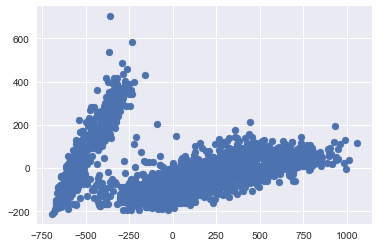

In [33]:
plt.scatter(X2[:, 0], X2[:, 1]);

In [35]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 0])

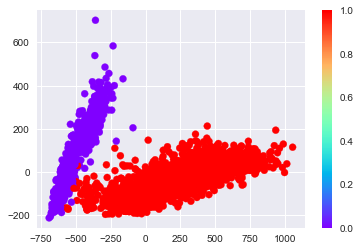

In [39]:
plt.scatter(X2[:, 0], X2[:, 1], c = labels, cmap='rainbow');
plt.colorbar()

In [42]:
len(labels)

2097

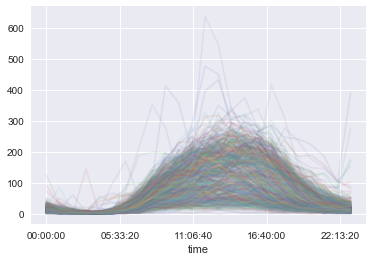

In [50]:
# filters the columns with labels of array of 0s and 1s
pivoted.T[labels==0].T.plot(legend=False, alpha = 0.1);

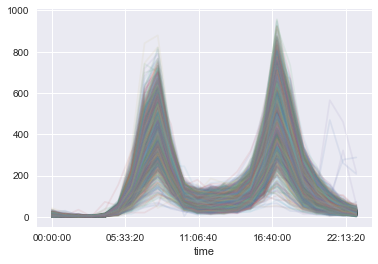

In [51]:
pivoted.T[labels==1].T.plot(legend=False, alpha = 0.1);

In [53]:
# want to see what day of week these graphs represnent 
pivoted.columns

Index([2012-10-03, 2012-10-04, 2012-10-05, 2012-10-06, 2012-10-07, 2012-10-08,
       2012-10-09, 2012-10-10, 2012-10-11, 2012-10-12,
       ...
       2018-06-21, 2018-06-22, 2018-06-23, 2018-06-24, 2018-06-25, 2018-06-26,
       2018-06-27, 2018-06-28, 2018-06-29, 2018-06-30],
      dtype='object', length=2097)

In [55]:
pd.DatetimeIndex(pivoted.columns).dayofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
           dtype='int64', length=2097)

In [56]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek

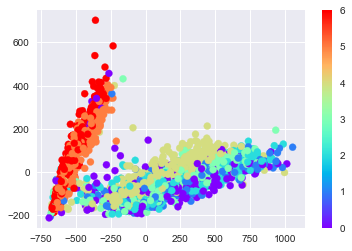

In [58]:
plt.scatter(X2[:, 0], X2[:, 1], c = day_of_week, cmap='rainbow');
plt.colorbar();

In [71]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dates.dayofweek<5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', length=1448, freq=None)

# Look at blog post on this analysis as well